# **Drug overdose deaths**


- Wrangling the data and Understanding it
- men/women vs drugs
- Age group death 
- Race vs Drugs


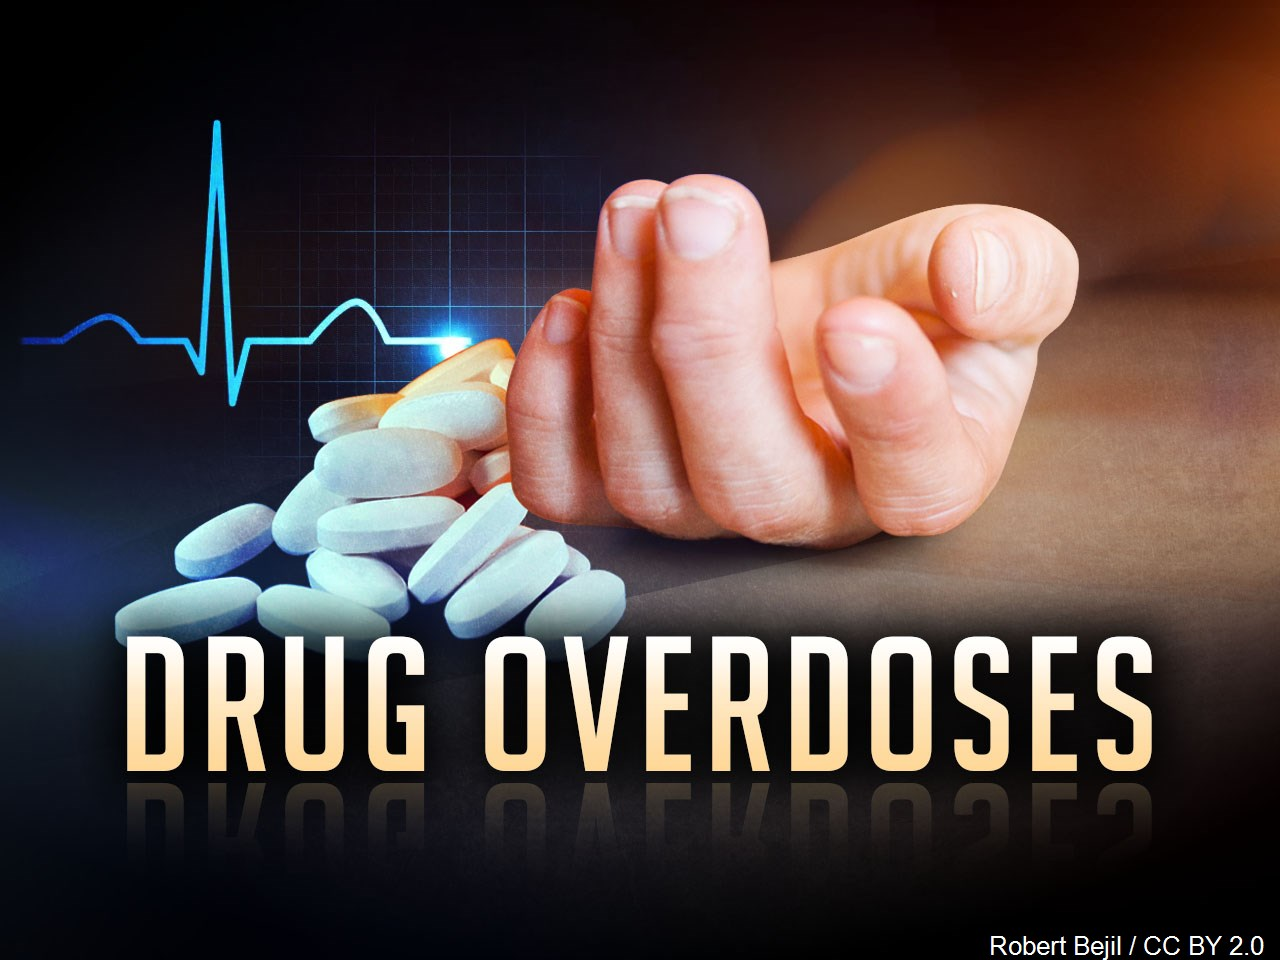

In [224]:
from IPython import display
display.Image("https://www.wtvq.com/wp-content/uploads/2019/07/MGN_1280x960_80205C00-ABFSB.jpg")

### *Wrangling the data and Understanding it*

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from IPython.core.display import HTML
import datetime as dt

In [271]:
main_drug_df = pd.read_csv('https://raw.githubusercontent.com/ameerfaour95/drug-overdose-deaths/main/drug_deaths.xls')
drug_df=main_drug_df.copy()
drug_df.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


##### droping all unnecessary columns

In [272]:
irrelevant_columns=['Unnamed: 0', 'ID','DateType']
drug_df.drop(irrelevant_columns,axis='columns' ,inplace=True)
drug_df["ResidenceCity"].fillna("Unknown City",inplace=True)

In [273]:
drug_df.dropna(subset=["Sex","Age","Race"],inplace=True)

In [274]:
drug_df=drug_df.loc[(drug_df.Sex != "Unknown")]

In [275]:
drug_df['Year'] = pd.DatetimeIndex(drug_df.Date).year.values.astype(int)
drug_df.drop(drug_df[(drug_df["Year"] < 0)].index,inplace=True)
drug_df['Month'] = pd.DatetimeIndex(drug_df.Date).month
drug_df['Weekday'] = pd.DatetimeIndex(drug_df.Date).weekday

##### changing nombers of weekday into names

In [276]:
for i in drug_df['Weekday']:
    if i==0:
        drug_df['Weekday'].replace([i],"Mon",inplace=True)
    elif i==1:
        drug_df['Weekday'].replace([i],"Tues",inplace=True)
    elif i==2:
        drug_df['Weekday'].replace([i],"Wed",inplace=True)
    elif i==3:
        drug_df['Weekday'].replace([i],"Thur",inplace=True)
    elif i==4:
        drug_df['Weekday'].replace([i],"Fri",inplace=True)
    elif i==5:
        drug_df['Weekday'].replace([i],"Sat",inplace=True)
    elif i==6:
        drug_df['Weekday'].replace([i],"Sun",inplace=True)

drug_df.tail(10)

,Date,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,DeathCounty,Location,...,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,Year,Month,Weekday
5095,03/17/2018 12:00:00 AM,37.0,Male,White,ESSEX,MIDDLESEX,CT,ESSEX,MIDDLESEX,Residence,...,NaN,0,1,Accident,"Essex, CT\n(41.353832, -72.396436)","ESSEX, CT\n(41.353832, -72.396436)","ESSEX, CT\n(41.353832, -72.396436)",2018,3,Sat
5096,07/31/2016 12:00:00 AM,54.0,Female,White,BETHEL,FAIRFIELD,CT,BETHEL,NaN,Residence,...,NaN,0,1,Accident,"BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)","BETHEL, CT\n(41.371727, -73.407448)",2016,7,Sun
5097,12/02/2017 12:00:00 AM,28.0,Female,White,MIDDLETOWN,MIDDLESEX,CT,MIDDLETOWN,MIDDLESEX,Residence,...,NaN,0,0,Accident,"Middletown, CT\n(41.544654, -72.651713)","MIDDLETOWN, CT\n(41.544654, -72.651713)","MIDDLETOWN, CT\n(41.544654, -72.651713)",2017,12,Sat
5098,04/17/2014 12:00:00 AM,56.0,Male,White,PLYMOUTH,NaN,NaN,PLYMOUTH,LITCHFIELD,Residence,...,NaN,0,0,Accident,"PLYMOUTH, CT\n(41.671982, -73.052909)","PLYMOUTH, CT\n(41.671982, -73.052909)","CT\n(41.575155, -72.738288)",2014,4,Thur
5099,01/07/2015 12:00:00 AM,45.0,Female,White,WATERBURY,NEW HAVEN,CT,WATERBURY,NEW HAVEN,Residence,...,NaN,0,1,Accident,"WATERBURY, CT\n(41.554261, -73.043069)","WATERBURY, CT\n(41.554261, -73.043069)","CT\n(41.575155, -72.738288)",2015,1,Wed
5100,09/08/2015 12:00:00 AM,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,NEW HAVEN,Residence,...,NaN,0,0,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)",2015,9,Tues
5101,07/22/2017 12:00:00 AM,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,NEW HAVEN,Hospital,...,NaN,0,0,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)",2017,7,Sat
5102,08/14/2018 12:00:00 AM,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,FAIRFIELD,Other,...,NaN,0,1,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)",2018,8,Tues
5103,03/16/2014 12:00:00 AM,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,NaN,Other,...,NaN,0,0,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",2014,3,Sun
5104,09/15/2016 12:00:00 AM,33.0,Male,White,THOMASTON,LITCHFIELD,CT,WATERBURY,NaN,Other,...,NaN,0,1,Accident,"WATERBURY, CT\n(41.554261, -73.043069)","THOMASTON, CT\n(41.674124, -73.073189)","WATERBURY, CT, CT\n(41.554261, -73.043069)",2016,9,Thur


#### Changing all drugs into int 

In [277]:
our_drugs=drug_df.iloc[:,18:32]
our_drugs.sum()

Heroin                                                             2525
Cocaine                                                            1514
Fentanyl              0011000000000000010011110101010100001001100100...
Fentanyl_Analogue                                                   388
Oxycodone                                                           604
Oxymorphone                                                         107
Ethanol                                                            1242
Hydrocodone                                                         116
Benzodiazepine                                                     1338
Methadone                                                           471
Amphet                                                              159
Tramad                                                              129
Morphine_NotHeroin    0000000000000000000000000000000000000000000000...
Hydromorphone                                                   

#### Fentanyl and Morphine_NotHeroin are in str
#### We made a for loop and changed all the unclear values to 0

In [278]:
for idx,i in enumerate(our_drugs["Fentanyl"]):
    if i!="0" and i!="1":
        print(idx,i)
        our_drugs['Fentanyl'].replace([i],0,inplace=True)
for idx,i in enumerate(our_drugs["Morphine_NotHeroin"]):
    if i!="0" and i!="1":
        print(idx,i)
        our_drugs['Morphine_NotHeroin'].replace([i],0,inplace=True)

504 1-A
2796 1 POPS
3728 1 (PTCH)
3788 0
59 1ES
580 STOLE MEDS
4184 NO RX BUT STRAWS
4367 PCP NEG


In [279]:
our_drugs['Fentanyl'].astype('int64')
our_drugs['Morphine_NotHeroin'].astype('int64')
our_drugs.sum()

Heroin               2525.0
Cocaine              1514.0
Fentanyl_Analogue     388.0
Oxycodone             604.0
Oxymorphone           107.0
Ethanol              1242.0
Hydrocodone           116.0
Benzodiazepine       1338.0
Methadone             471.0
Amphet                159.0
Tramad                129.0
Hydromorphone          24.0
dtype: float64

In [280]:
our_drugs=drug_df.iloc[:,18:32]
our_drugs.tail()

,Heroin,Cocaine,Fentanyl,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone
5100,0,0,0,0.0,0,0,1,0,1,0,0,0,0,0
5101,1,0,0,0.0,0,0,0,0,1,0,0,0,0,0
5102,1,0,1,1.0,0,0,0,0,0,0,0,1,0,0
5103,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0
5104,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0


### *Men/Women vs Drugs*

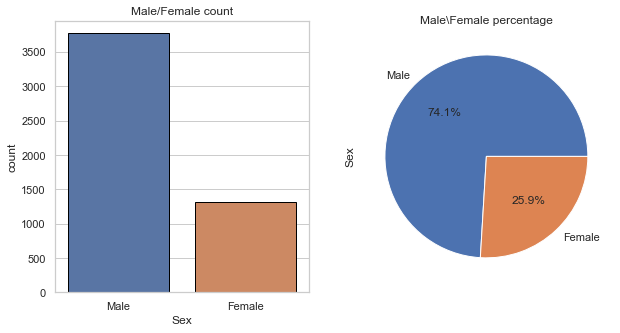

In [281]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Male/Female count")
sns.countplot( x="Sex", data=drug_df , edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("Male\Female percentage")
drug_df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()


##### there are more men tham women, thats why on the next steps we are going to refer to the mean and not the count of the conections.

# What Do You Think ? 
### who dies from Prescription drugs and who'm from unprescripted drugs?


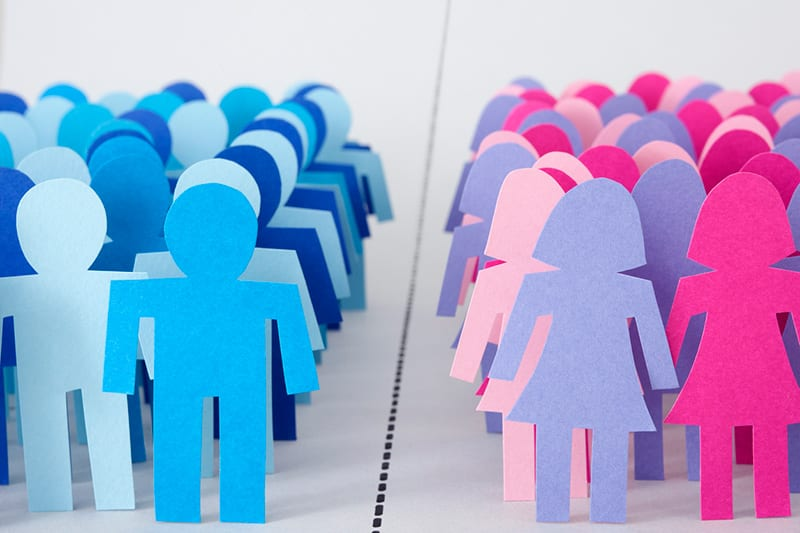

In [282]:
display.Image("https://wp02-media.cdn.ihealthspot.com/wp-content/uploads/sites/486/2019/09/27153206/Testosterone-Levels-in-Men-vs.-Women.jpg",width=600)

In [283]:
female = drug_df.loc[drug_df.Sex == 'Female']
male = drug_df.loc[drug_df.Sex == 'Male']

In [284]:
male.groupby('Sex')[["Heroin","Cocaine","Fentanyl","Fentanyl_Analogue","Morphine_NotHeroin","Benzodiazepine","Ethanol","Oxymorphone","Oxycodone","Methadone","Amphet","Tramad","Hydromorphone"]].sum().sort_values(["Heroin"],ascending=[False])

,Heroin,Cocaine,Fentanyl_Analogue,Benzodiazepine,Ethanol,Oxymorphone,Oxycodone,Methadone,Amphet,Tramad,Hydromorphone
Sex,,,,,,,,,,,
Male,1987,1135,306.0,877,969,72,401,313,111,83,15


In [285]:
female.groupby('Sex')[["Heroin","Cocaine","Fentanyl","Fentanyl_Analogue","Morphine_NotHeroin","Benzodiazepine","Ethanol","Oxymorphone","Oxycodone","Methadone","Amphet","Tramad","Hydromorphone"]].sum().sort_values(["Heroin"],ascending=[False])

,Heroin,Cocaine,Fentanyl_Analogue,Benzodiazepine,Ethanol,Oxymorphone,Oxycodone,Methadone,Amphet,Tramad,Hydromorphone
Sex,,,,,,,,,,,
Female,538,379,82.0,461,273,35,203,158,48,46,9


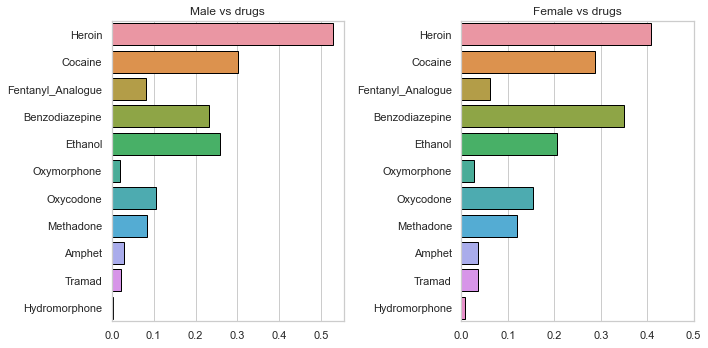

In [286]:
all_drugs = ["Heroin","Cocaine","Fentanyl_Analogue","Benzodiazepine","Ethanol","Oxymorphone","Oxycodone","Methadone","Amphet","Tramad","Hydromorphone"]
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Male vs drugs")
sns.barplot(x=male[all_drugs].mean(),y=male[all_drugs].columns, edgecolor = 'black')
plt.subplot(1,2,2)
plt.title("Female vs drugs")
g =sns.barplot(x=female[all_drugs].mean(),y=female[all_drugs].columns, edgecolor = 'black')
g.set(xlim=(0, 0.5))
plt.tight_layout()
plt.show()

### we can see that in womens figure there is one suspisious bar wich is "benzodiazepine",it might reflect of a use of women in Prescripted drugs our next step is to check it more deepley

In [287]:
Desc_sex=drug_df.groupby(["Sex"])["DescriptionofInjury"].value_counts().sort_values(ascending=[False])
number_death_of_female=female["Sex"].count()
number_death_of_male=male["Sex"].count()

In [288]:
By_gender=drug_df[["Sex","DescriptionofInjury"]].dropna()
Contain_med = By_gender[By_gender["DescriptionofInjury"].str.startswith(('Med','med','Used Medications','Oxycodone','Took Me','ALCOHOL MED','Drank Alcohol and Took Pres','prescription','Ingested medicines','Ingested'))]
Contain_med

,Sex,DescriptionofInjury
137,Male,Used Medications
152,Female,Ingested medicines
271,Male,Ingested medications
301,Male,Ingested medication
328,Female,Ingested multiple medications
...,...,...
4969,Female,Ingested medicines
4975,Male,Ingested Prescription Medications
5053,Male,Took Medications
5059,Female,Took Medications


In [289]:
femaleD=Contain_med[Contain_med["Sex"].str.startswith("Female")].count()
percent_female=femaleD[0:1]/number_death_of_female
percent_female=percent_female*100

In [290]:
maleD=Contain_med[Contain_med["Sex"].str.startswith("Male")].count()
percent_male=maleD[0:1]/number_death_of_male
percent_male=percent_male*100
percent_male

Sex    1.353862
dtype: float64

<BarContainer object of 2 artists>

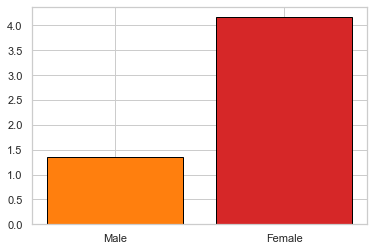

In [291]:
precent_gender=np.array([percent_male.values[0],percent_female.values[0]]).astype(float)
precent_gender
colorSS=["tab:orange","tab:red"]
plt.bar(x=['Male','Female'],height=precent_gender, edgecolor = 'black', color = colorSS)

### this bar shows us how many male died from Prescripted drug from the total amount of men, and same to women.
### we can see that 4% females died from Prescripted drugs unlike men that has only 1.3%

### we can see from the Data that women are more likely to die from three main drugs(Heroin,Benzodiazepine,Cocaine)=two that are unprescripted and one prescripted ,unlike men that are more likely to die from (Heroin,Cocaine,Ethanol)=all unprescripted drugs.
#### *we can explain it by stress, maybe women are more exposed\effected to stress than men are, we can see  it in different articles that published at USA.*  


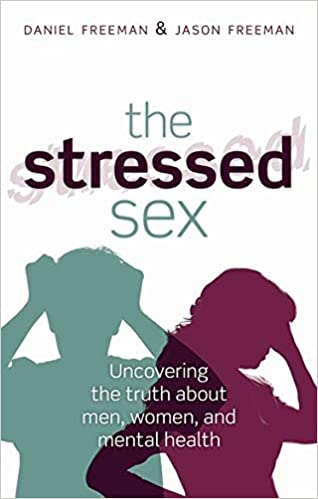

In [247]:
display.Image("https://images-na.ssl-images-amazon.com/images/I/41Ox46zcEOL._SX316_BO1,204,203,200_.jpg",width=150)

#Taken from American Psychological Association:
https://www.apa.org/news/press/releases/stress/2011/gender

#some more artticles that suport our claim:

https://www.google.com/search?q=men+vs+women+stress&tbm=isch&ved=2ahUKEwj05-ypoOLwAhVRgRoKHYnUD1QQ2-cCegQIABAA&oq=men+vs+women+stress&gs_lcp=CgNpbWcQAzIECCMQJzoECAAQEzoICAAQCBAeEBNQm_fGAlifjscCYPaPxwJoAnAAeACAAY0BiAHaB5IBAzAuOJgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=GJOrYPT7CNGCaompv6AF&bih=695&biw=1366&safe=strict#imgrc=8HRHYzmvv1Qw7M

https://www.labroots.com/trending/neuroscience/13179/stress-vs-women

### *Age group deaths*

Text(0, 0.5, 'Deaths')

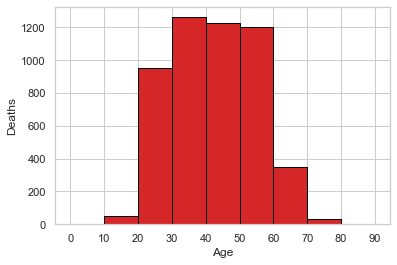

In [248]:
age = drug_df['Age']
plt.hist(age, bins = range(0, 100, 10) , edgecolor = 'black', color = "tab:red")
plt.xticks(range(0, 100, 10))
plt.style.context('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Deaths')

### the age range of most dead is 30-60 
#### we want to see next how it spreads by gender vs amount

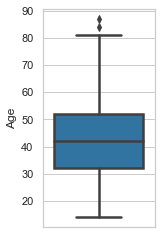

In [249]:
plt.figure(figsize=(2,4))
sns.set(style="whitegrid")
agex = sns.boxplot(y="Age", data=drug_df, linewidth=2.5,color="tab:blue")

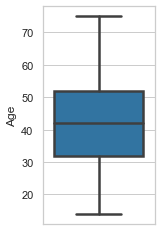

In [250]:
drug_df = drug_df[drug_df['Age'] < 80].reset_index(drop=True)
plt.figure(figsize=(2,4))
sns.set(style="whitegrid")
agex = sns.boxplot(y="Age", data=drug_df, linewidth=2.5,color="tab:blue")

In [251]:
Gender_Age=drug_df.copy()
Male_Female_Age=Gender_Age[["Age","Sex"]]
Male_Female_Age_sorted=Male_Female_Age.sort_values("Age")
until_twente=Male_Female_Age_sorted[Male_Female_Age_sorted["Age"]<21]
between_twente_and_thirty=Male_Female_Age_sorted.loc[(Male_Female_Age_sorted.Age > 20) & (Male_Female_Age_sorted.Age < 31)]
more_than_thirty=Male_Female_Age_sorted[Male_Female_Age_sorted["Age"]>30]

In [252]:
drug_df["Age Group"]="20-30"
drug_df.loc[drug_df["Age"]<21 , "Age Group"]="10-20"
drug_df.loc[drug_df["Age"]>31 , "Age Group"]="30-80"

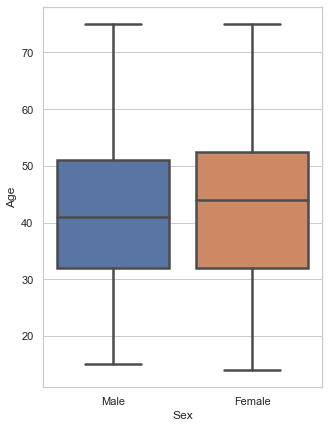

In [253]:
plt.figure(figsize=(5,7))
agex = sns.boxplot(x="Sex",y="Age", data=drug_df, linewidth=2.5)

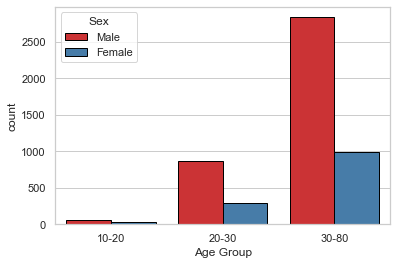

In [254]:
order=["10-20","20-30","30-80"]
sns.countplot(x="Age Group", hue="Sex" , data=drug_df, palette="Set1", edgecolor = 'black' ,order = order)
plt.show()

## what can we say about the age? 
### we notice that most people who dies from drugs are at the ages 30-55 more or less. it can be explained by many reasons, one of them is that this is midlife.you get family,money essues and more stress so you use drugs "to leave it all behind".

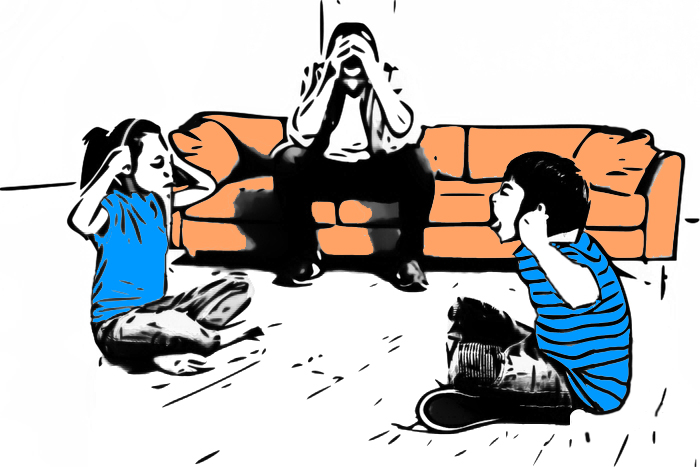

In [255]:
display.Image("https://cleape.com/wp-content/uploads/2016/07/10K-Clear-Child-Psychology-Help-with-Family-Problems.jpg")

### *Days/years*

## what do you think we will see next? 
### we wanted to explain more the effect of emotional reaction, so we desided to see if there were any differences over the years or days..


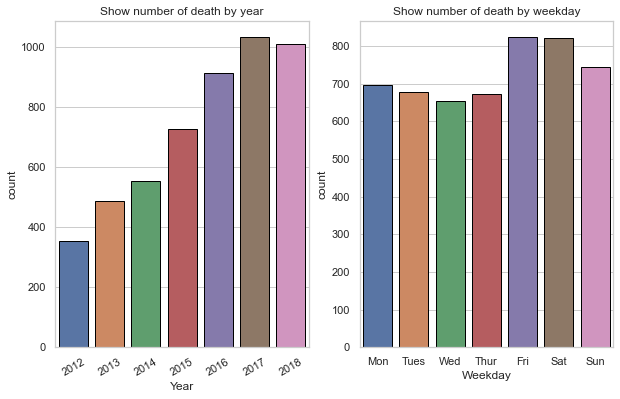

In [256]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.title("Show number of death by year")
g=sns.countplot(x="Year",data=drug_df, edgecolor = 'black')
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.subplot(1,2,2)
plt.title("Show number of death by weekday")
sns.countplot(x="Weekday",data=drug_df,order=['Mon', 'Tues', 'Wed', 'Thur', 'Fri' , 'Sat', 'Sun'], edgecolor = 'black')


### we can see that there was an increase between the years 2012-2018, and we can see that the days that are more centralized with death are weekend days (Friday-Sunday,(4-6)). wich kind of suport our conclusion beacuse people work at middle of the week and at weekend they are with their family and there are more parties so it is more accessible to use drugs.

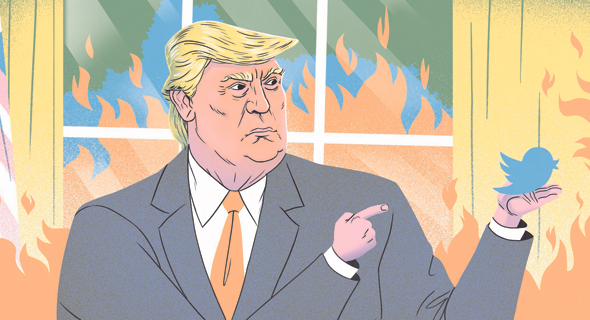

In [257]:
display.Image("https://images1.calcalist.co.il/PicServer3/2020/06/01/994639/1NL.jpg")

### *Race vs Drugs*

### *our main data is concentrated in Black, White, Hispanic, so we will take only the 3 tabs and try to analyze it by different categories.*

In [258]:
Races = pd.get_dummies(drug_df['Race'])

In [259]:
only_W_B_H=drug_df.loc[(drug_df.Race == 'Black') | (drug_df.Race == 'White')|(drug_df.Race == 'Hispanic, White')|(drug_df.Race == 'Hispanic, Black')]
only_W_B_H=only_W_B_H.reset_index(drop=True)

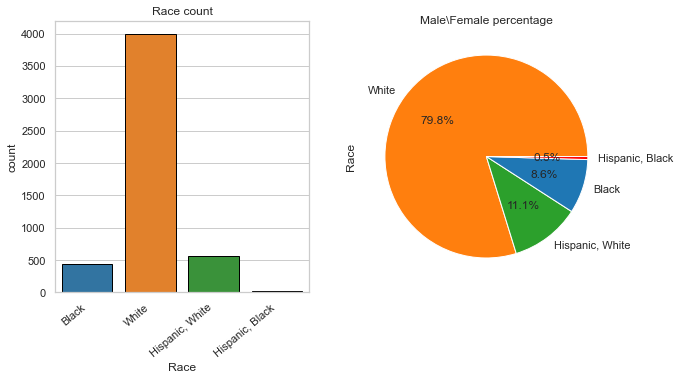

In [260]:
colors=['tab:orange', 'tab:green','tab:blue','red']
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title("Race count")
ba=sns.countplot( x="Race", data=only_W_B_H,palette=['tab:blue','tab:orange', 'tab:green','tab:blue','red'], edgecolor = 'black')
ba.set_xticklabels(ba.get_xticklabels(), rotation=40, ha="right")
plt.subplot(1,2,2)
plt.title("Male\Female percentage")
only_W_B_H['Race'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

plt.show()

In [261]:
a=Races["Hispanic, Black"].astype(int)
b=Races["Hispanic, White"].astype(int)
Races["Hispanic"]= a+b
Races.drop(columns=["Chinese","Hawaiian","Hispanic, Black","Hispanic, White","Native American, Other", "Other","Unknown","Asian Indian","Asian, Other"],inplace=True)
Races["year"]=drug_df["Year"]
Races_year=Races

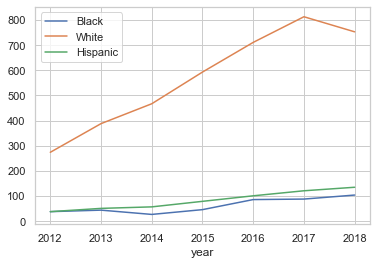

In [262]:
making_plot=Races_year.groupby('year')[["Black","White","Hispanic"]].sum().sort_values(["year"],ascending=[True])
making_plot.plot()


#### *after we saw there was an increase in the amount of dead over the years we wanted to check if there is any reason to that.  we took the races and checked for connection and we found out that the only race that has effected it was the whites. the black and Hispanic stayed more or less the same.*


In [263]:
uni_race = drug_df.copy()
hisp_mask = uni_race['Race'].str.startswith('Hispanic,')
other_mask = uni_race['Race']=='Unknown'
uni_race.loc[hisp_mask,'Race'] = 'Hispanic'

# got all unwanted columns and left with 3 main races vs. drugs

uni_race = uni_race[uni_race['Race']!='Unknown']
uni_race = uni_race[uni_race['Race']!='Asian, Other']
uni_race = uni_race[uni_race['Race']!='Asian Indian']
uni_race = uni_race[uni_race['Race']!='Other']
uni_race = uni_race[uni_race['Race']!='Chinese']
uni_race = uni_race[uni_race['Race']!='Hawaiian']
uni_race = uni_race[uni_race['Race']!='Native American, Other']
race_drug=uni_race.groupby(["Race"])[["Heroin","Cocaine","Fentanyl","Fentanyl_Analogue","Morphine_NotHeroin","Benzodiazepine","Ethanol","Oxymorphone","Oxycodone","Methadone","Amphet","Tramad","Hydromorphone"]].sum().sort_values(["Heroin"],ascending=[False])



In [264]:
df1=pd.DataFrame(data=race_drug)
data_transposed=df1.astype(object).T
black_drugs=data_transposed[["Black"]]
white_drugs=data_transposed[["White"]]
Hispanic_drugs=data_transposed[["Hispanic"]]

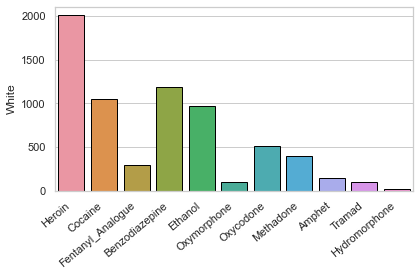

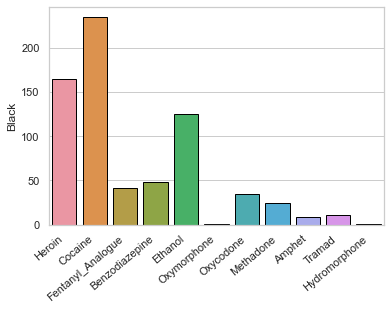

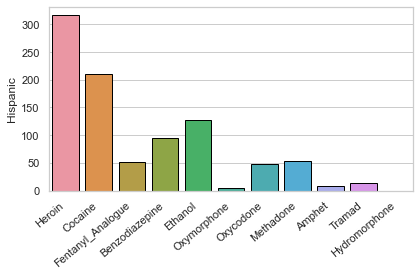

In [265]:
plt.figure()
ax = sns.barplot(x=white_drugs.index, y="White", edgecolor = 'black', data=white_drugs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
ax = sns.barplot(x=black_drugs.index, y="Black", edgecolor = 'black', data=black_drugs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
plt.show()
ax = sns.barplot(x=Hispanic_drugs.index, y="Hispanic", edgecolor = 'black', data=Hispanic_drugs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### How heroin works
https://edition.cnn.com/2014/02/04/health/how-heroin-kills/index.html

#### *when we specify the connections of races to drug type we see that whites are more likely to choose heroine and black use cocaine. after we read an interesting article about using cocaine vs Heroine we know that Heroine is a drug that makes you sleepy so that can vote of the dead place. so we wanted to see if what we have read has reflected to our data*


In [268]:
Location=only_W_B_H.loc[(only_W_B_H.Location == 'Hospital') | (only_W_B_H.Location == 'Residence')|(only_W_B_H.Location == 'Other')]
only_W_B_H=only_W_B_H.reset_index(drop=True)

[Text(0, 0, 'Hospital'), Text(0, 0, 'Residence'), Text(0, 0, 'Other')]

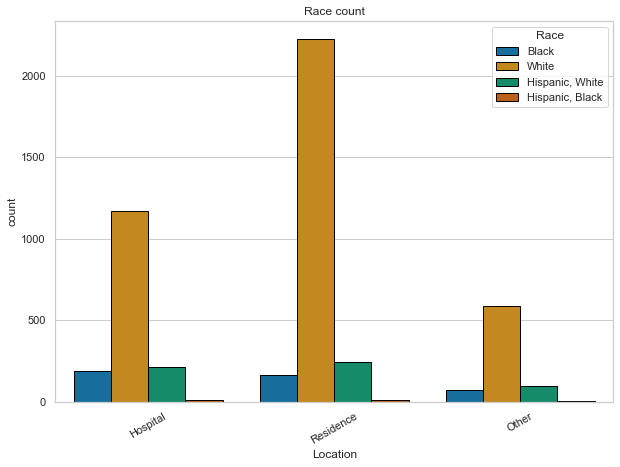

In [269]:
#kk = sns.countplot(data=only_W_B_H, x="Age",y="Location", hue = 'Race', palette = 'colorblind')
plt.figure(figsize=(10,7))
plt.title("Race count")
kk=sns.countplot( x="Location",data=Location,edgecolor='black', hue = 'Race', palette = 'colorblind')
kk.set_xticklabels(kk.get_xticklabels(),rotation=30)

[Text(0, 0, 'Hospital'), Text(0, 0, 'Residence'), Text(0, 0, 'Other')]

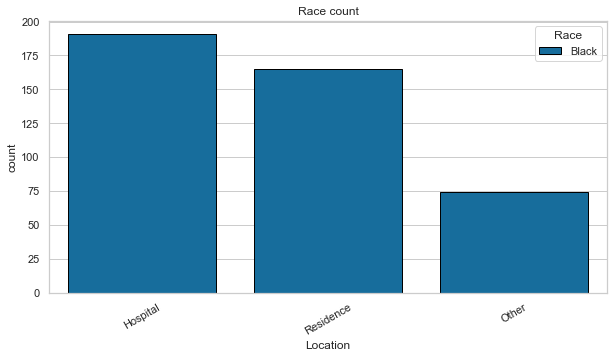

In [270]:
only_B=drug_df.loc[(drug_df.Race == 'Black')]
LocationB=only_B.loc[(only_B.Location == 'Hospital') | (only_B.Location == 'Residence')|(only_B.Location == 'Other')]
plt.figure(figsize=(10,5))
plt.title("Race count")
kk=sns.countplot( x="Location",data=LocationB,edgecolor='black', hue = 'Race', palette = 'colorblind')
kk.set_xticklabels(kk.get_xticklabels(),rotation=30)

#### *for conclusion we can see that it really does have a connection. people who use cocaine die more at hospital than people who use heroine that die at home. it can be explained by that heroine makes you sleepy so they die while they're asleep at home.*
